<a href="https://colab.research.google.com/github/fityanhanif/Bank_Churn_Predictions/blob/main/Bank_Churn_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


# Langkah 1: Import **Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Langkah 2: Unggah Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()  # Pilih file CSV dataset Anda

Saving bank_churn_modeling.csv to bank_churn_modeling.csv


# Langkah 3: Membaca Dataset

In [ ]:
dataset = pd.read_csv(next(iter(uploaded.keys())))  # Membaca dataset dari file yang diunggah
print("Dataset loaded successfully!")
print(dataset.head())

Dataset loaded successfully!
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3      

# Langkah 4: Exploratory Data Analysis (EDA)
# Cek informasi dataset

In [ ]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore          Age        Tenure  \
count  10000

# Cek missing values

In [ ]:
print("Missing Values:\n", dataset.isnull().sum())

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             3
Age                3
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# Langkah 5: Encoding Fitur Kategorikal
# Encode Geography dan Gender

In [ ]:
le_gender = LabelEncoder()
dataset['Gender'] = le_gender.fit_transform(dataset['Gender'])  # Male=1, Female=0

dataset = pd.get_dummies(dataset, columns=['Geography'], drop_first=True)  # One-Hot Encoding


# Langkah 6: Pisahkan Fitur dan Target

In [ ]:
X = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = dataset['Exited']


# Langkah 7: Pisahkan Data Training dan Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Langkah 8: Model Gradient Boosting
# a. XGBoost

In [ ]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# b. LightGBM

In [ ]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019


# c. CatBoost

In [ ]:
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
catboost_pred = catboost_model.predict(X_test)

# Langkah 9: Evaluasi Model

In [ ]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

evaluate_model("XGBoost", y_test, xgb_pred)
evaluate_model("LightGBM", y_test, lgbm_pred)
evaluate_model("CatBoost", y_test, catboost_pred)


XGBoost Performance:
Accuracy: 0.856
Confusion Matrix:
 [[1510   83]
 [ 205  202]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.71      0.50      0.58       407

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000


LightGBM Performance:
Accuracy: 0.861
Confusion Matrix:
 [[1526   67]
 [ 211  196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000


CatBoost Performance:
Accuracy: 0.8665
Confusion Matrix:
 [[1533   60]
 [ 207  200]]
Classification Report:
               preci

# Langkah 10: Feature Importance untuk XGBoost

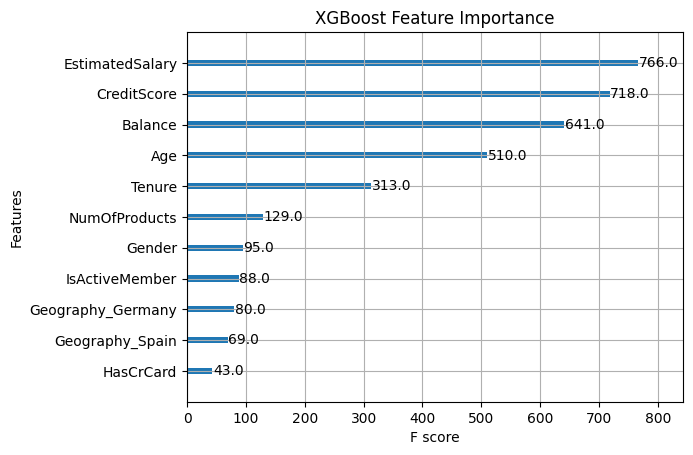

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()

# Langkah 11: Interpretasi dengan SHAP (Opsional, butuh library tambahan)

In [ ]:
!pip install shap  # Pastikan Anda memiliki SHAP
import shap

In [ ]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

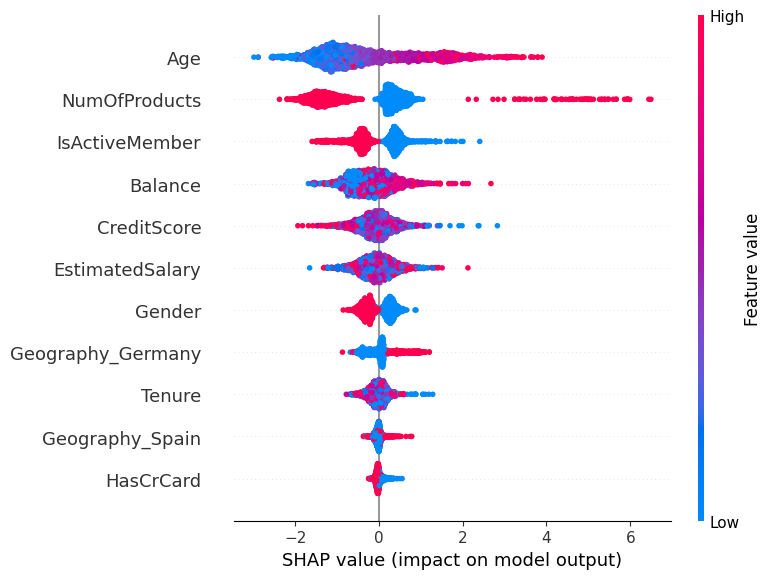

In [ ]:
shap.summary_plot(shap_values, X_test)

# Menggabungkan prediksi dengan data pengujian (X_test)


In [ ]:
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Prediksi Churn/Tetap'] = xgb_pred  # Ganti dengan prediksi model yang Anda inginkan

# Menampilkan beberapa hasil
print(X_test_with_predictions.head())  # Menampilkan 5 prediksi pertama


      CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
5702          585       3  36.0       7       0.00              2          1   
3667          525       3  33.0       4  131023.76              2          0   
1617          557       1  40.0       4       0.00              2          0   
5673          639       3  34.0       5  139393.19              2          0   
4272          640       1  34.0       3   77826.80              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
5702               0         94283.09              False            False   
3667               0         55072.93               True            False   
1617               1        105433.53              False             True   
5673               0         33950.08              False             True   
4272               1        168544.85              False             True   

      Prediksi Churn/Tetap  
5702                     0 

# Menambahkan CustomerId ke hasil prediksi

In [ ]:
X_test_with_predictions['CustomerId'] = dataset.loc[X_test.index, 'CustomerId']

# Menampilkan beberapa hasil prediksi dengan ID Pelanggan
print(X_test_with_predictions[['CustomerId', 'Prediksi Churn/Tetap']].head())


      CustomerId  Prediksi Churn/Tetap
5702    15749540                     0
3667    15807340                     0
1617    15801062                     0
5673    15572801                     0
4272    15600708                     0


#  menampilkan pelanggan yang diprediksi churn:

In [ ]:
# Menggabungkan prediksi dengan data pengujian (X_test)
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Prediksi Churn/Tetap'] = xgb_pred  # Ganti dengan prediksi model yang Anda inginkan

# Menambahkan CustomerId ke hasil prediksi
X_test_with_predictions['CustomerId'] = dataset.loc[X_test.index, 'CustomerId']

# Memfilter pelanggan yang diprediksi churn (Prediksi Churn/Tetap == 1)
churn_customers = X_test_with_predictions[X_test_with_predictions['Prediksi Churn/Tetap'] == 1]

# Menampilkan pelanggan yang diprediksi churn
print(churn_customers[['CustomerId', 'Prediksi Churn/Tetap']])


      CustomerId  Prediksi Churn/Tetap
7068    15730793                     1
2350    15646764                     1
4799    15656683                     1
3982    15627665                     1
4994    15585580                     1
...          ...                   ...
4883    15593280                     1
5264    15691817                     1
5886    15812920                     1
5750    15583392                     1
9719    15724321                     1

[285 rows x 2 columns]


In [ ]:
# Menyimpan pelanggan yang diprediksi churn ke file CSV
churn_customers[['CustomerId', 'Prediksi Churn/Tetap']].to_csv('churn_customers.csv', index=False)


# Visualisasi

####  1. Bar Chart: Menunjukkan perbandingan jumlah pelanggan yang diprediksi tetap dan churn.

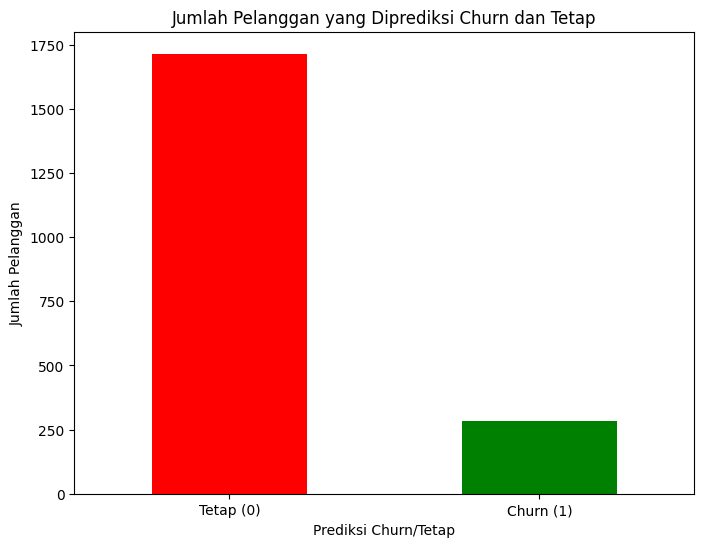

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah prediksi churn (1) dan tetap (0)
churn_counts = X_test_with_predictions['Prediksi Churn/Tetap'].value_counts()

# Membuat grafik batang
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Jumlah Pelanggan yang Diprediksi Churn dan Tetap')
plt.xlabel('Prediksi Churn/Tetap')
plt.ylabel('Jumlah Pelanggan')
plt.xticks([0, 1], ['Tetap (0)', 'Churn (1)'], rotation=0)
plt.show()


#### 2. Pie Chart: Menunjukkan persentase pelanggan yang diprediksi tetap vs churn.

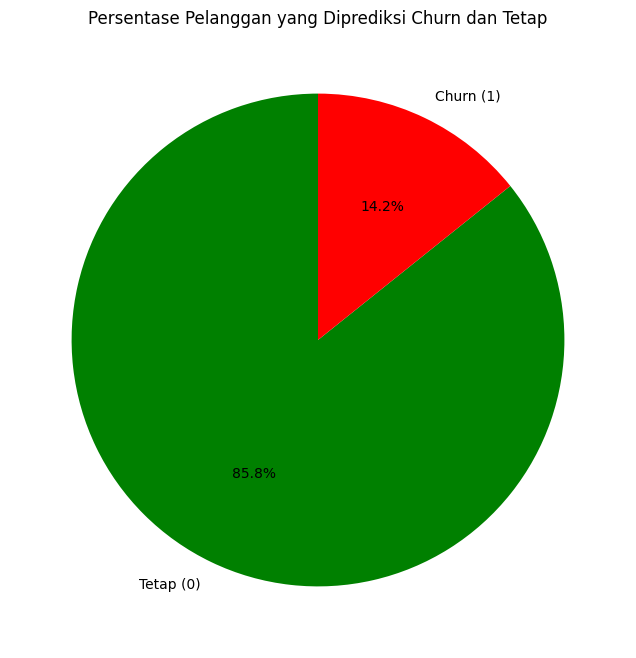

In [ ]:
# Membuat grafik pie
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['Tetap (0)', 'Churn (1)'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Persentase Pelanggan yang Diprediksi Churn dan Tetap')
plt.show()


#### 3. Menggabungkan dengan Fitur Lain

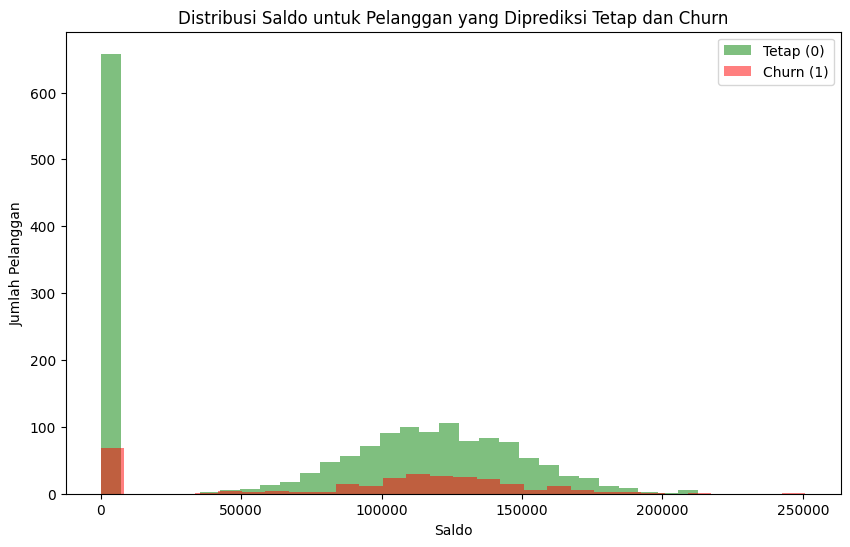

In [ ]:
# Menambahkan kolom 'Age' dan 'Balance' ke data prediksi untuk analisis
X_test_with_predictions['Age'] = dataset.loc[X_test.index, 'Age']
X_test_with_predictions['Balance'] = dataset.loc[X_test.index, 'Balance']

# Membuat histogram distribusi saldo untuk pelanggan yang diprediksi churn dan tetap
plt.figure(figsize=(10, 6))
plt.hist(X_test_with_predictions[X_test_with_predictions['Prediksi Churn/Tetap'] == 0]['Balance'], bins=30, alpha=0.5, label='Tetap (0)', color='green')
plt.hist(X_test_with_predictions[X_test_with_predictions['Prediksi Churn/Tetap'] == 1]['Balance'], bins=30, alpha=0.5, label='Churn (1)', color='red')
plt.title('Distribusi Saldo untuk Pelanggan yang Diprediksi Tetap dan Churn')
plt.xlabel('Saldo')
plt.ylabel('Jumlah Pelanggan')
plt.legend()
plt.show()
